In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models, optimizers
import matplotlib.pyplot as plt

In [ ]:
(train_images,train_lables),(test_images,test_lables) =datasets.cifar10.load_data()
train_images,test_images= train_images/255.0, test_images/255.0  #pixel

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256,activation='tanh'),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer= optimizers.SGD(learning_rate=0.001, momentum= 0.9)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images,train_lables,epochs=15,batch_size=128,validation_data=(test_images,test_lables))


Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5629 - loss: 1.2200 - val_accuracy: 0.5144 - val_loss: 1.3765
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5853 - loss: 1.1582 - val_accuracy: 0.5182 - val_loss: 1.3646
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5831 - loss: 1.1610 - val_accuracy: 0.5179 - val_loss: 1.3892
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5934 - loss: 1.1361 - val_accuracy: 0.5067 - val_loss: 1.4134
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6000 - loss: 1.1187 - val_accuracy: 0.5247 - val_loss: 1.3677
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6092 - loss: 1.0905 - val_accuracy: 0.5118 - val_loss: 1.4037
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6165 - loss: 1.0693 - val_accuracy: 0.5193 - val_loss: 1.3760
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6203 - loss: 1.0604 - val_

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_lables, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 3ms/step - accuracy: 0.5117 - loss: 1.4056
Test accuracy: 0.5116999745368958


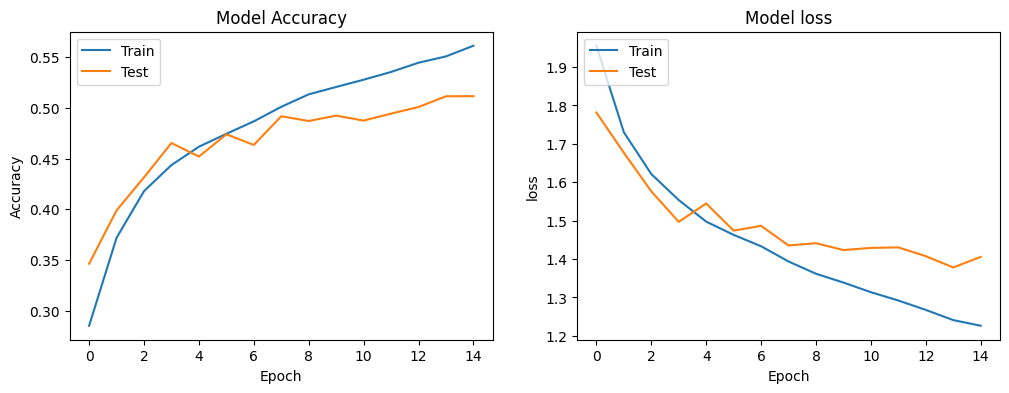

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'],loc='upper left')


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'],loc='upper left')

plt.show()